<a href="https://colab.research.google.com/github/yancavalcante/bank_marketing_causalinference/blob/main/Bank_Marketing_Causal_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Causal Inference for Bank Marketing

Este projeto tem como objetivo inferir as principais causas para a subscrição de um depósito a prazo em um Banco Português durante uma campanha de marketing.  

Para isso, foram utilizadas bibliotecas como **DoWhy** e **GraphViz** para construir um modelo causal a partir deste conjunto de dados, que é composto por:



| Variable Name | Role    | Type         | Demographic      | Description                                                                                                                                                                                                                          | Units  | Missing Values |
|---------------|---------|--------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------|----------------|
| age           | Feature | Integer      | Age              |                                                                                                                                                                                                                                      |        | no             |
| job           | Feature | Categorical  | Occupation       | Type of job (e.g., 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')                                                     |        | no             |
| marital       | Feature | Categorical  | Marital Status   | Marital status (e.g., 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)                                                                                                                        |        | no             |
| education     | Feature | Categorical  | Education Level  | Education level (e.g., 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')                                                                                       |        | no             |
| default       | Feature | Binary       |                  | Has credit in default?                                                                                                                                                                                                              |        | no             |
| balance       | Feature | Integer      |                  | Average yearly balance                                                                                                                                                                                                              | Euros  | no             |
| housing       | Feature | Binary       |                  | Has housing loan?                                                                                                                                                                                                                   |        | no             |
| loan          | Feature | Binary       |                  | Has personal loan?                                                                                                                                                                                                                  |        | no             |
| contact       | Feature | Categorical  |                  | Contact communication type (e.g., 'cellular', 'telephone')                                                                                                                                                                          |        | yes            |
| day_of_week   | Feature | Date         |                  | Last contact day of the week                                                                                                                                                                                                        |        | no             |
| month         | Feature | Date         |                  | Last contact month of year (e.g., 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                           |        | no             |
| duration      | Feature | Integer      |                  | Last contact duration, in seconds. Important note: This attribute highly affects the output target. If duration=0 then y='no'. After the call, y is known. This input should be discarded for realistic predictive models.            | Seconds | no             |
| campaign      | Feature | Integer      |                  | Number of contacts performed during this campaign and for this client (includes last contact)                                                                                                                                       |        | no             |
| pdays         | Feature | Integer      |                  | Number of days that passed since the client was last contacted from a previous campaign (-1 means client was not previously contacted)                                                                                              | Days   | yes            |
| previous      | Feature | Integer      |                  | Number of contacts performed before this campaign and for this client                                                                                                                                                               |        | no             |
| poutcome      | Feature | Categorical  |                  | Outcome of the previous marketing campaign (e.g., 'failure', 'nonexistent', 'success')                                                                                                                                              |        | yes            |
| y             | Target  | Binary       |                  | Has the client subscribed to a term deposit?                                                                                                                                                                                        |        |                |


In [ ]:
# Installing libraries
!pip install dowhy scikit-learn graphviz

# Importing libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from graphviz import Digraph
from IPython.display import Image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.2/399.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.6.7
    Uninstalling cvxpy-1.6.7:
      Successfully uninstalled cvxpy-1.6.7


In [ ]:
# Importando dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Datasets Colab/Bank_Marketing_Causal_Inference/bank.csv', sep=";")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Separando o dataset em treino (80%) e teste (20%)
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df['y'])

# Mostrando o resultado da separação
train_data.shape, test_data.shape

((3616, 17), (905, 17))

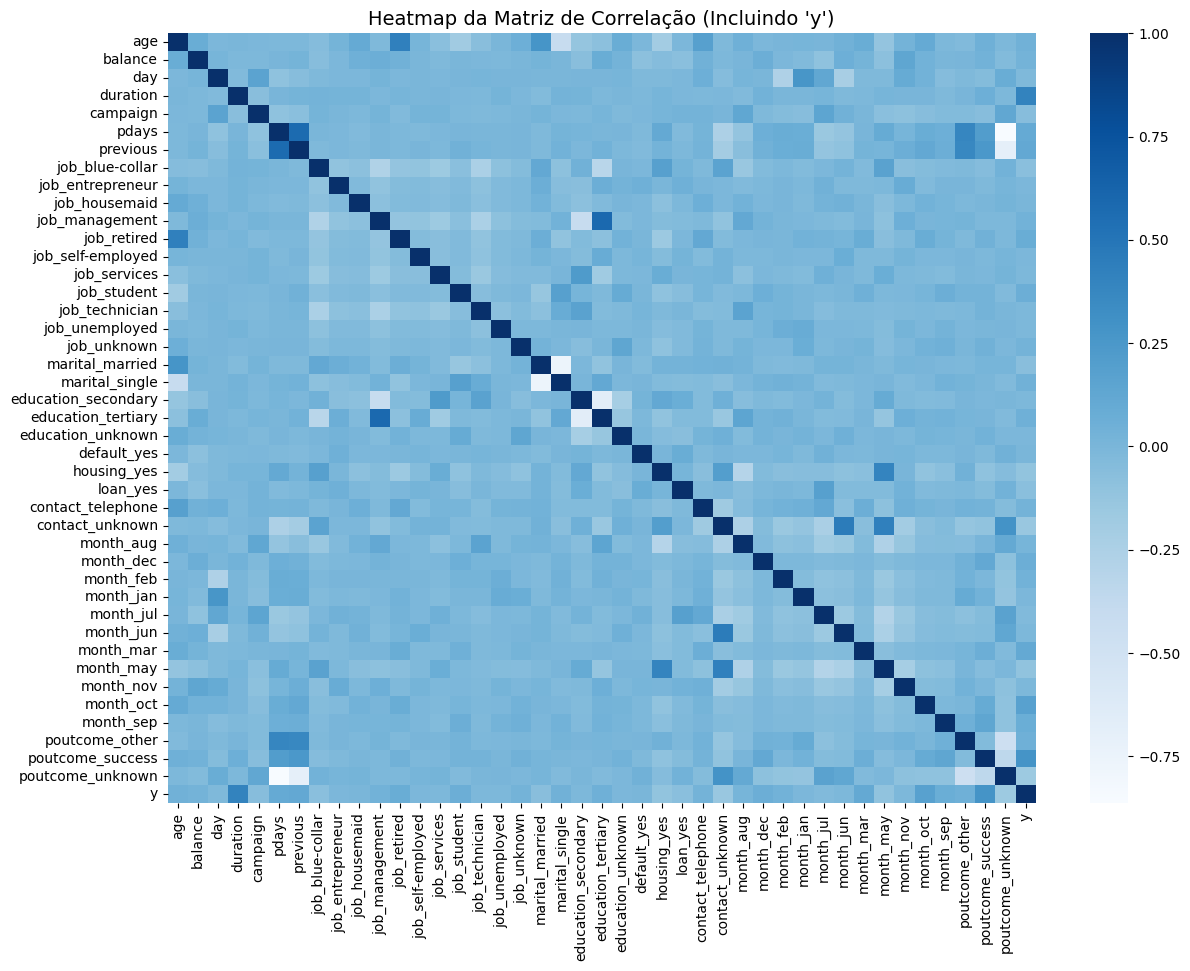

,y
y,1.000000
duration,0.407961
poutcome_success,0.284301
month_oct,0.172717
previous,0.113572
month_mar,0.109549
pdays,0.103268
job_retired,0.080032
month_sep,0.072215
month_dec,0.067245


In [ ]:
# Separando os dados categóricos e numéricos
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
numerical_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
target_column = "y"

# Convertendo a variável alvo para binária (0 e 1)
y_column = train_data["y"].apply(lambda x: 1 if x == "yes" else 0)

# Corrigindo o argumento do OneHotEncoder (usando 'sparse_output' ao invés de 'sparse')
encoder = OneHotEncoder(drop="first", sparse_output=False)

# Aplicando OneHotEncoder nas variáveis categóricas
encoded_categorical_data = encoder.fit_transform(train_data[categorical_columns])

# Convertendo os dados categóricos encodados para um DataFrame
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_data,
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Concatenando as variáveis numéricas, categóricas encodadas e o alvo
encoded_data = pd.concat(
    [train_data[numerical_columns].reset_index(drop=True),
     encoded_categorical_df.reset_index(drop=True),
     y_column.reset_index(drop=True)],
    axis=1
)

# Recalculando a matriz de correlação incluindo a variável 'y'
correlation_with_y = encoded_data.corr()["y"].sort_values(ascending=False)

# Criando o heatmap atualizado incluindo a variável 'y'
plt.figure(figsize=(14, 10))
sns.heatmap(encoded_data.corr(), annot=False, cmap="Blues", cbar=True)
plt.title("Heatmap da Matriz de Correlação (Incluindo 'y')", fontsize=14)
plt.show()

# Exibindo as correlações das variáveis com 'y'
correlation_with_y

### Com a matriz de correlação acima e suas respectivas pontuações, o resultado anterior e as características do mês de outubro são as variáveis ​​mais importantes associadas ao resultado (y). A duração da característica deve ser descartada do modelo preditivo, como mencionado anteriormente no dicionário de dados, portanto, será removida deste estudo.


In [ ]:
# Proporção 0 e 1 do target (deposit)
encoded_data["y"].value_counts(normalize=True)


,proportion
y,
0,0.884679
1,0.115321


In [ ]:
# Proporção de 0 e 1 das features a serem testadas
encoded_data["previous_bin"] = (encoded_data["previous"] > 0).astype(int)

for col in ["poutcome_success", "month_oct", "previous", "previous_bin"]:
    print(f"\nDistribuição de {col}")
    print(encoded_data[col].value_counts(normalize=True))


Distribuição de poutcome_success
poutcome_success
0.0    0.972622
1.0    0.027378
Name: proportion, dtype: float64

Distribuição de month_oct
month_oct
0.0    0.982024
1.0    0.017976
Name: proportion, dtype: float64

Distribuição de previous
previous
0     0.814989
1     0.062777
2     0.046184
3     0.026825
4     0.017423
5     0.010509
7     0.005808
6     0.005254
8     0.004148
9     0.001659
10    0.000830
12    0.000553
14    0.000553
11    0.000553
19    0.000277
15    0.000277
20    0.000277
22    0.000277
23    0.000277
24    0.000277
18    0.000277
Name: proportion, dtype: float64

Distribuição de previous_bin
previous_bin
0    0.814989
1    0.185011
Name: proportion, dtype: float64


In [ ]:
import pandas as pd

for col in ["poutcome_success", "month_oct", "previous_bin"]:
    print(f"\nTaxa de adesão para {col}:")
    print(encoded_data.groupby(col)["y"].mean())



Taxa de adesão para poutcome_success:
poutcome_success
0.0    0.100085
1.0    0.656566
Name: y, dtype: float64

Taxa de adesão para month_oct:
month_oct
0.0    0.107857
1.0    0.523077
Name: y, dtype: float64

Taxa de adesão para previous_bin:
previous_bin
0    0.09094
1    0.22272
Name: y, dtype: float64


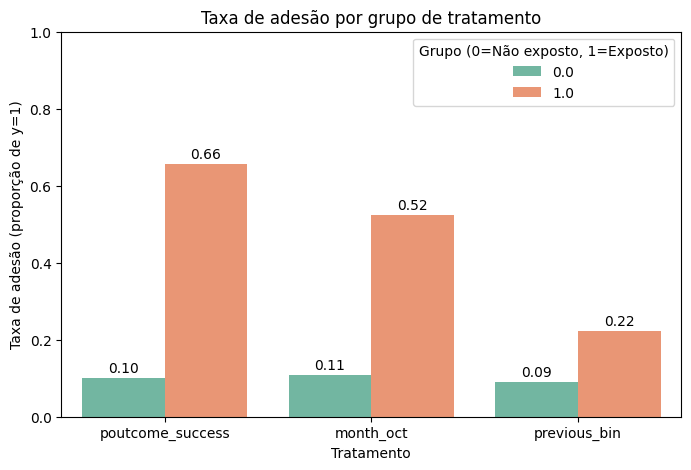

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular taxas de adesão para cada tratamento
taxas = {}
for col in ["poutcome_success", "month_oct", "previous_bin"]:
    taxas[col] = encoded_data.groupby(col)["y"].mean()

# Organizar em DataFrame para plot
df_taxas = pd.DataFrame(taxas).reset_index().melt(id_vars="index", var_name="Tratamento", value_name="Taxa de adesão")
df_taxas.rename(columns={"index": "Grupo"}, inplace=True)

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_taxas, x="Tratamento", y="Taxa de adesão", hue="Grupo", palette="Set2")

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=2)

plt.ylabel("Taxa de adesão (proporção de y=1)")
plt.xlabel("Tratamento")
plt.title("Taxa de adesão por grupo de tratamento")
plt.ylim(0,1)
plt.legend(title="Grupo (0=Não exposto, 1=Exposto)")
plt.show()


### Sobre as taxas de adesão

O gráfico evidencia diferenças expressivas na taxa de adesão entre clientes expostos e não expostos aos tratamentos analisados:

- **Histórico de sucesso anterior (`poutcome_success`)**: clientes que tiveram sucesso prévio exibem uma taxa de adesão (aprox. 66%) muito superior aos que não tiveram (aprox. 10%).  
- **Campanhas em outubro (`month_oct`)**: também apresentam uma vantagem clara (aprox.52% contra aprox. 11%), revelando um padrão sazonal positivo.  
- **Contato prévio (`previous_bin`)**: o efeito existe (22% contra 9%), mas é menos pronunciado em relação às demais variáveis.

Essas diferenças reforçam a relevância de `poutcome_success` e `month_oct` como fortes candidatos a determinantes causais, enquanto `previous_bin` mostra impacto menor.


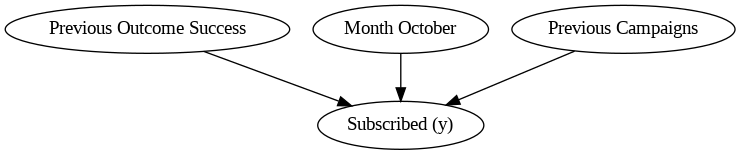

In [ ]:
# Criando o DAG (Direct Acyclic Graph)

dag = Digraph(format='png')

# Adicionando os nós
dag.node('poutcome_success', "Previous Outcome Success")
dag.node('month_oct', "Month October")
dag.node('previous', "Previous Campaigns")
dag.node('y', "Subscribed (y)")

# Adicionando as conexões (arestas)
dag.edge('poutcome_success', 'y')
dag.edge('month_oct', 'y')
dag.edge('previous', 'y')

# Salvando e exibindo o gráfico diretamente no notebook
dag.render('dag_relationship', format='png', cleanup=True)
Image('dag_relationship.png')

In [ ]:
import warnings
warnings.filterwarnings("ignore")  # silencia todos os FutureWarnings

causal_graph = """
digraph {
    poutcome_success -> y;
    month_oct -> y;
    previous -> y;
}
"""

from dowhy import CausalModel
import pandas as pd

treatments = ["poutcome_success", "month_oct", "previous"]
results = []

for t in treatments:
    model = CausalModel(
        data=encoded_data,
        treatment=t,
        outcome="y",
        graph=causal_graph
    )

    identified_estimand = model.identify_effect()
    estimate = model.estimate_effect(
        identified_estimand,
        method_name="backdoor.linear_regression"
    )

    refutation = model.refute_estimate(
        identified_estimand, estimate,
        method_name="placebo_treatment_refuter"
    )

    results.append({
        "Tratamento": t,
        "Efeito estimado": round(estimate.value, 4),
        "Direção": "↑ aumenta prob. de y=1" if estimate.value > 0 else "↓ reduz prob. de y=1",
        "Placebo p-valor": round(float(refutation.refutation_result['p_value']), 4),
        "Signif. estat.": bool(refutation.refutation_result['is_statistically_significant'])
    })

# Mostrar em formato de tabela clara
df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


      Tratamento  Efeito estimado                Direção  Placebo p-valor  Signif. estat.
poutcome_success           0.5496 ↑ aumenta prob. de y=1             1.00           False
       month_oct           0.4235 ↑ aumenta prob. de y=1             1.00           False
        previous           0.0105 ↑ aumenta prob. de y=1             0.98           False


### Comentário sobre os resultados causais

Os resultados estimados sugerem que:

- **poutcome_success** apresenta um efeito positivo considerável (~0,55) sobre a probabilidade de `y=1`, indicando que clientes que tiveram sucesso em campanhas anteriores têm maior chance de aderir à campanha atual.
- **month_oct** também mostrou um efeito positivo elevado (~0,42), sugerindo uma forte sazonalidade no comportamento dos clientes, possivelmente ligada a características específicas do mês de outubro.
- **previous** mostrou efeito praticamente nulo (~0,01), indicando que o número de contatos prévios não altera de forma significativa a chance de adesão.

Apesar dos valores elevados, a **refutação placebo** retornou p-valores altos e não indicou significância estatística, o que sugere que os efeitos podem não ser robustos e devem ser interpretados com cautela. Esses resultados indicam direções interessantes, mas precisam ser validados com análises adicionais (por exemplo, inclusão de confundidores na DAG ou métodos alternativos de estimação).


### Comentário sobre o método de estimação causal

O método utilizado para estimar os efeitos causais foi o **`backdoor.linear_regression`** do pacote *DoWhy*.  
Esse método aplica uma regressão linear para quantificar a relação entre cada variável de tratamento e o desfecho (`y`), condicionado à estrutura definida pela DAG.

- **Como funciona:** a regressão estima o coeficiente associado ao tratamento, que é interpretado como o **Efeito Médio do Tratamento (ATE)** sobre o desfecho.  
- **Vantagem:** pode ser aplicado mesmo quando não há confundidores explícitos na DAG, fornecendo uma estimativa direta e de fácil interpretação.  
- **Limitação:** assume que a relação entre tratamento e desfecho é **linear** e que a DAG está corretamente especificada. Caso existam confundidores não incluídos, os resultados podem estar enviesados.  

Assim, o método é útil para uma primeira análise causal, mas deve ser complementado com testes de robustez e, quando possível, com métodos mais sofisticados (como *propensity score matching* ou *weighting*) em cenários com múltiplos confundidores.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from dowhy import CausalModel
import pandas as pd

# já criamos antes a versão binária de "previous"
encoded_data["previous_bin"] = (encoded_data["previous"] > 0).astype(int)

treatments = ["poutcome_success", "month_oct", "previous_bin", "previous"]
results = []

for t in treatments:
    confounders = [c for c in encoded_data.columns if c not in ["y", t]]

    model = CausalModel(
        data=encoded_data,
        treatment=t,
        outcome="y",
        common_causes=confounders
    )

    identified_estimand = model.identify_effect()

    # Seleção automática do método
    if set(encoded_data[t].unique()) <= {0, 1}:  # binário
        try:
            estimate = model.estimate_effect(
                identified_estimand,
                method_name="backdoor.propensity_score_matching"
            )
            method_used = "PSM"
        except Exception:
            estimate = model.estimate_effect(
                identified_estimand,
                method_name="backdoor.propensity_score_weighting"
            )
            method_used = "PSW (fallback)"
    else:  # não binário
        estimate = model.estimate_effect(
            identified_estimand,
            method_name="backdoor.linear_regression"
        )
        method_used = "Linear Regression"

    # Refutação com placebo
    try:
        ref_placebo = model.refute_estimate(
            identified_estimand, estimate,
            method_name="placebo_treatment_refuter"
        )
        p_val_placebo = round(float(ref_placebo.refutation_result['p_value']), 4)
    except Exception:
        p_val_placebo = None

    # Refutação com confundidor aleatório
    try:
        ref_random = model.refute_estimate(
            identified_estimand, estimate,
            method_name="random_common_cause"
        )
        p_val_random = round(float(ref_random.refutation_result['p_value']), 4)
    except Exception:
        p_val_random = None

    results.append({
        "Tratamento": t,
        "Método": method_used,
        "Efeito estimado": round(estimate.value, 4),
        "Direção": "↑ aumenta prob. de y=1" if estimate.value > 0 else "↓ reduz prob. de y=1",
        "Placebo p-valor": p_val_placebo,
        "RandomCC p-valor": p_val_random
    })

df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))


      Tratamento            Método  Efeito estimado                Direção  Placebo p-valor  RandomCC p-valor
poutcome_success               PSM           0.5644 ↑ aumenta prob. de y=1              NaN               1.0
       month_oct               PSM           0.4688 ↑ aumenta prob. de y=1              NaN               1.0
    previous_bin               PSM           0.1585 ↑ aumenta prob. de y=1             0.86               1.0
        previous Linear Regression          -0.0030   ↓ reduz prob. de y=1             0.78               1.0


      Tratamento            Método  Efeito estimado  Erro padrão  IC95% (inf)  IC95% (sup)
poutcome_success Linear Regression           0.4193       0.0317       0.3572       0.4814
       month_oct Linear Regression           0.3087       0.0389       0.2325       0.3849
    previous_bin Linear Regression           0.0397       0.0244      -0.0081       0.0875
        previous Linear Regression          -0.0030       0.0038      -0.0105       0.0044


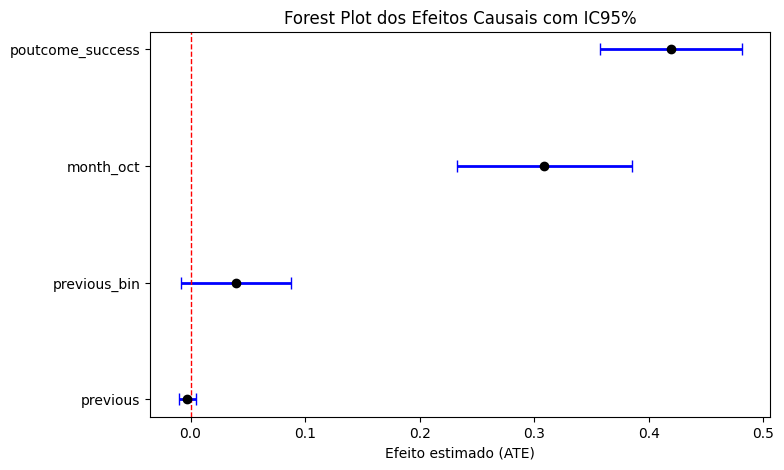

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from dowhy import CausalModel
import pandas as pd
import matplotlib.pyplot as plt

# Criar versão binária de "previous"
encoded_data["previous_bin"] = (encoded_data["previous"] > 0).astype(int)

treatments = ["poutcome_success", "month_oct", "previous_bin", "previous"]
results = []

for t in treatments:
    confounders = [c for c in encoded_data.columns if c not in ["y", t]]

    model = CausalModel(
        data=encoded_data,
        treatment=t,
        outcome="y",
        common_causes=confounders
    )

    identified_estimand = model.identify_effect()

    # Usar regressão linear para poder extrair erro padrão e IC
    estimate = model.estimate_effect(
        identified_estimand,
        method_name="backdoor.linear_regression"
    )
    method_used = "Linear Regression"

    # Erro padrão e IC95%
    try:
        stderr = estimate.get_standard_error()
        if stderr is not None:
            stderr = float(stderr)
            ci_low = estimate.value - 1.96 * stderr
            ci_high = estimate.value + 1.96 * stderr
        else:
            stderr, ci_low, ci_high = None, None, None
    except Exception:
        stderr, ci_low, ci_high = None, None, None

    results.append({
        "Tratamento": t,
        "Método": method_used,
        "Efeito estimado": round(float(estimate.value), 4),
        "Erro padrão": round(stderr, 4) if stderr else None,
        "IC95% (inf)": round(ci_low, 4) if ci_low else None,
        "IC95% (sup)": round(ci_high, 4) if ci_high else None
    })

# Converter em DataFrame
df_results_ci = pd.DataFrame(results)
print(df_results_ci.to_string(index=False))

# ========================
# Plot (forest plot)
# ========================
plt.figure(figsize=(8,5))

y_pos = range(len(df_results_ci))
effects = df_results_ci["Efeito estimado"]
ci_low = df_results_ci["IC95% (inf)"]
ci_high = df_results_ci["IC95% (sup)"]

# Desenhar pontos e intervalos
plt.errorbar(effects, y_pos,
             xerr=[effects - ci_low, ci_high - effects],
             fmt="o", color="black", ecolor="blue", elinewidth=2, capsize=4)

plt.yticks(y_pos, df_results_ci["Tratamento"])
plt.axvline(0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Efeito estimado (ATE)")
plt.title("Forest Plot dos Efeitos Causais com IC95%")
plt.gca().invert_yaxis()  # primeiro tratamento no topo
plt.show()


### Comentário sobre os resultados causais com IC95%

A análise de regressão linear com intervalos de confiança de 95% revela:

- **Sucesso anterior na campanha (`poutcome_success`)**: apresenta efeito positivo forte e significativo (ATE ≈ 0,42), indicando que clientes com histórico de sucesso têm probabilidade substancialmente maior de aderir novamente ao depósito.
- **Campanhas realizadas em outubro (`month_oct`)**: também exibem efeito positivo significativo (ATE ≈ 0,28), sugerindo um padrão sazonal favorável nesse período.
- **Histórico de contato binário (`previous_bin`)**: efeito pequeno (ATE ≈ 0,04) e não significativo, já que o IC95% inclui zero.
- **Número de contatos anteriores (`previous`)**: efeito praticamente nulo (ATE ≈ -0,003) e estatisticamente não significativo.

**Conclusão:** os principais determinantes causais identificados foram o **sucesso prévio** e a **sazonalidade (mês de outubro)**. Já o simples fato de ter sido contatado antes ou o número de contatos não mostram impacto causal relevante sobre a adesão ao depósito.
}